In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons, make_circles, make_classification

In [27]:
def plot_data(ax,ds,name='',marker = 'o',alpha=0.7, s = 150, facecolor=True):
    X, y = ds

    ax.set_title(name, fontsize = 30)
    if facecolor:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap='RdBu',s = s,
                   alpha =alpha)
    else:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap='RdBu',s = s,
                   facecolor = 'None',
                   alpha =alpha)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    ax.grid(True)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

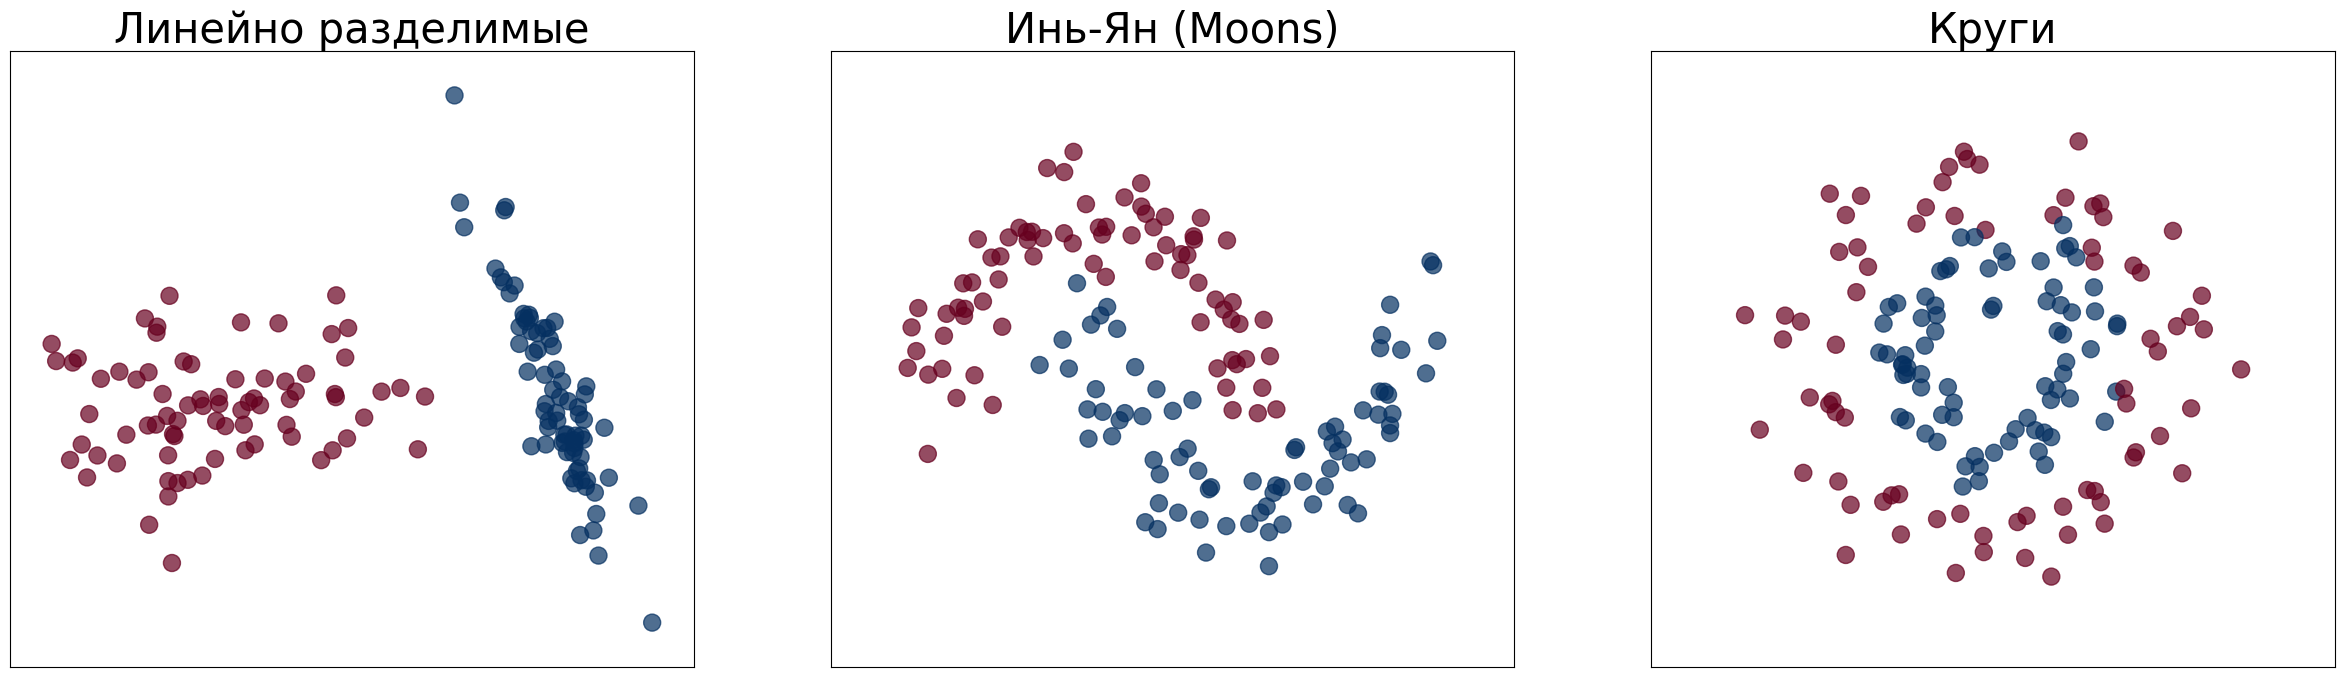

In [28]:
#@title данные { run: "auto" }
N = 150 #@param {type:"slider", min:50, max:250, step:25}
noises = 0.15 #@param {type:"slider", min:0, max:1, step:0.05}

def make_binary_clf(N, method = 'line',
                    noises = 0.15,
                    random_state = 42):

    if random_state: rng = np.random.RandomState(seed = random_state)

    if method == 'line' or method is None:
        X, y = make_classification(n_samples=N, n_features=2,
                                   n_redundant=0, n_informative=2,
                                   n_clusters_per_class=1, class_sep=2,
                                   random_state=random_state)
        X += np.random.randn(*X.shape) *noises
        out = (X, y)

    elif method == 'moons':
        X, y = make_moons(n_samples=N, noise=noises,
                          random_state=random_state)

    elif method == 'circles':
        X, y = make_circles(n_samples=N, noise=noises, factor=0.5,
                            random_state=random_state )


    return X,y


fig=plt.figure(figsize=(30,8))

ax = plt.subplot(1, 3, 1)
plot_data(ax,make_binary_clf(N,method = 'line', noises = noises),
          'Линейно разделимые')
ax = plt.subplot(1, 3, 2)
plot_data(ax,make_binary_clf(N,method = 'moons', noises = noises),
          'Инь-Ян (Moons)')
ax = plt.subplot(1, 3, 3)
plot_data(ax, make_binary_clf(N,method = 'circles', noises = noises),
          'Круги')

In [29]:
X,y = make_binary_clf(N,method = 'line', noises=0.05, )


X.shape

(150, 2)

In [30]:
X

array([[ 1.82844462,  2.40576464],
       [ 1.33510688,  3.57292829],
       [-2.42153416,  2.14520616],
       [-4.02621576,  1.54116855],
       [-3.63449753,  1.61453147],
       [ 1.56070507,  3.0109457 ],
       [ 2.43834234,  0.97189469],
       [-2.70095265,  1.08997487],
       [ 2.36491686,  1.05148455],
       [ 1.15852922,  4.23668613],
       [ 1.76151218,  2.56821028],
       [ 1.00524549,  4.0588403 ],
       [ 0.61200135,  5.58900128],
       [ 1.16509235,  4.13777229],
       [-1.45656631,  2.43660708],
       [ 1.59869223,  2.69738756],
       [-0.99544042,  1.88758777],
       [ 1.40203482,  3.33735227],
       [-0.67330353,  2.65366883],
       [ 2.38226874,  1.01480728],
       [ 2.39332902,  1.06211754],
       [ 1.76964728,  2.47178069],
       [ 1.94229476,  2.35684594],
       [ 2.14237025,  1.53414335],
       [ 2.67350572,  0.35735082],
       [-2.49230459,  0.23934164],
       [-3.90493221,  2.52412817],
       [-2.21654158,  1.32105054],
       [ 2.1740264 ,

In [36]:
def distance(X1, X2, metric = 'euclidean', p = 2):
    if metric == 'euclidean':
        dist = np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
    if metric == 'cityblock':
        dist = np.sum(np.abs(X1 - X2).T,axis=0)
    if metric == 'Chebyshev':
        dist = np.max(np.abs(X1 - X2).T,axis=0)
    if metric == 'Minkowski':
        dist = np.power(np.sum(np.power(np.abs(X1 - X2),p).T,axis=0),1/p)
    return dist

In [37]:
X[:5]

array([[ 1.82844462,  2.40576464],
       [ 1.33510688,  3.57292829],
       [-2.42153416,  2.14520616],
       [-4.02621576,  1.54116855],
       [-3.63449753,  1.61453147]])

In [38]:
X[10:15]

array([[ 1.76151218,  2.56821028],
       [ 1.00524549,  4.0588403 ],
       [ 0.61200135,  5.58900128],
       [ 1.16509235,  4.13777229],
       [-1.45656631,  2.43660708]])

In [39]:
print(distance(X[0], X[1],metric = 'cityblock'))
print(distance(X[:5], X[10:15]))
print(distance(X[0], X[10:15]))

1.6605013876163037
[0.17569444 0.58729806 4.58934227 5.80448368 2.32791596]
[0.17569444 1.84670407 3.40774554 1.85469316 3.28515571]


In [40]:
metrics = ['euclidean','cityblock','Chebyshev','Minkowski']

In [41]:
for metric in metrics:
    print(distance(X[0], X[1],metric = metric, p = 10))

1.267143680371932
1.6605013876163037
1.1671636481217922
1.1671848914250842


In [42]:
def init_centroids(X, n_clusters, random_state = 42):
    if random_state: rng = np.random.seed(random_state)
    centroid_idxs = np.random.randint(0, X.shape[0], size = n_clusters)
    return X[centroid_idxs,:]

In [43]:
n_clusters = 2
centroids = init_centroids(X, n_clusters)
print(centroids)

[[-2.46951693  2.37976229]
 [ 1.81942429  2.34811229]]


In [44]:
def predict(X, n_clusters, centroids, metric = 'euclidean', p = 2):
    distances = np.zeros((X.shape[0], n_clusters))

    for i,centr in enumerate(centroids):
        distances[:,i] = distance(centr,X, metric, p)

    cluster_label = np.argmin(distances,axis = 1)
    return cluster_label, distances

In [45]:
def plot_cluster(X,centroids, cluster_label, centroids_label, old_centroids = None, old_centroids_label = None):

    fig = plt.figure(figsize=(11,10))

    plt.scatter(X[:, 0], X[:, 1],
                c = cluster_label, cmap = 'bwr',
                s=100,alpha = 0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                c = centroids_label, cmap = 'bwr',
                s=400, edgecolors = 'k')

    if old_centroids is not None:
        plt.scatter(old_centroids[:, 0], old_centroids[:, 1],
            c = old_centroids_label, cmap = 'bwr',
            s=200, edgecolors = 'k')

    plt.xticks([])
    plt.yticks([])

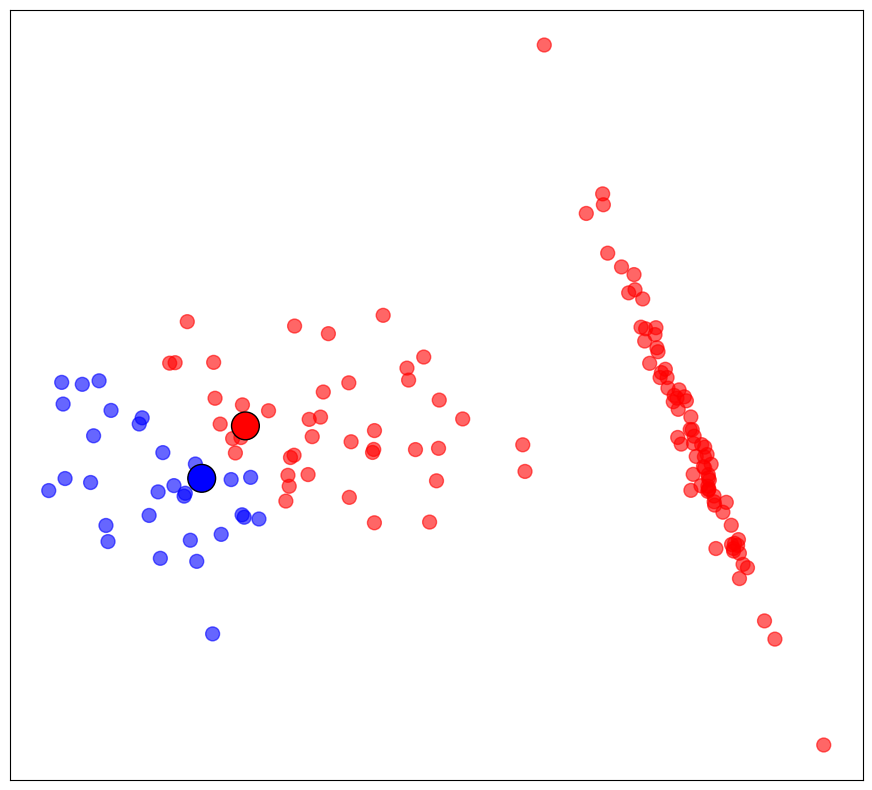

In [46]:
centroids = init_centroids(X, n_clusters, random_state=32)

cluster_label, distances=predict(X, n_clusters, centroids)
centroids_label = [0,1]

plot_cluster(X,centroids,
             cluster_label, centroids_label,)

In [47]:
old_centroids = np.copy(centroids)

for k in range(n_clusters):
    c_idxs = np.flatnonzero(cluster_label==k)
    centroids[k] = X[c_idxs].mean(axis = 0)

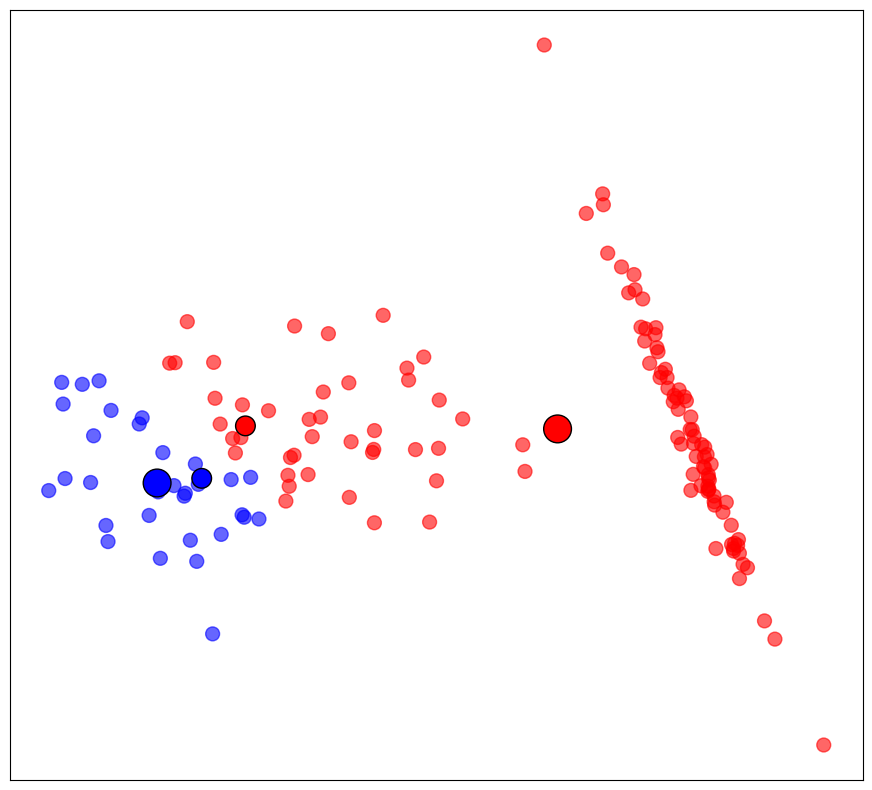

In [48]:
plot_cluster(X,centroids,
             cluster_label, centroids_label,
             old_centroids, centroids_label)

In [49]:
def delta_centroids(centroids,old_centroids, metric = 'euclidean', p = 2):
    return (distance(centroids,old_centroids, metric, p)/distance(old_centroids, np.mean(old_centroids), metric, p)).mean()

delta_centroids(centroids,old_centroids)

0.5458882248327188

In [50]:
def fit(X, n_clusters, centroids, max_iter=10, tol=0.01, metric = 'euclidean', p = 2):

    dcentr = np.inf

    for i in range(max_iter):

        old_centroids = np.copy(centroids)
        cluster_label,_=predict(X, n_clusters, centroids, metric, p)

        for k in range(n_clusters):
            c_idxs = np.flatnonzero(cluster_label==k)
            centroids[k] = X[c_idxs].mean(axis = 0)

        dcentr = delta_centroids(centroids,old_centroids, metric, p)

        if dcentr<=tol:
            break

    print('Мы остановились на итерации:', i,', относительное изменение центроидов: ',dcentr)

    return cluster_label

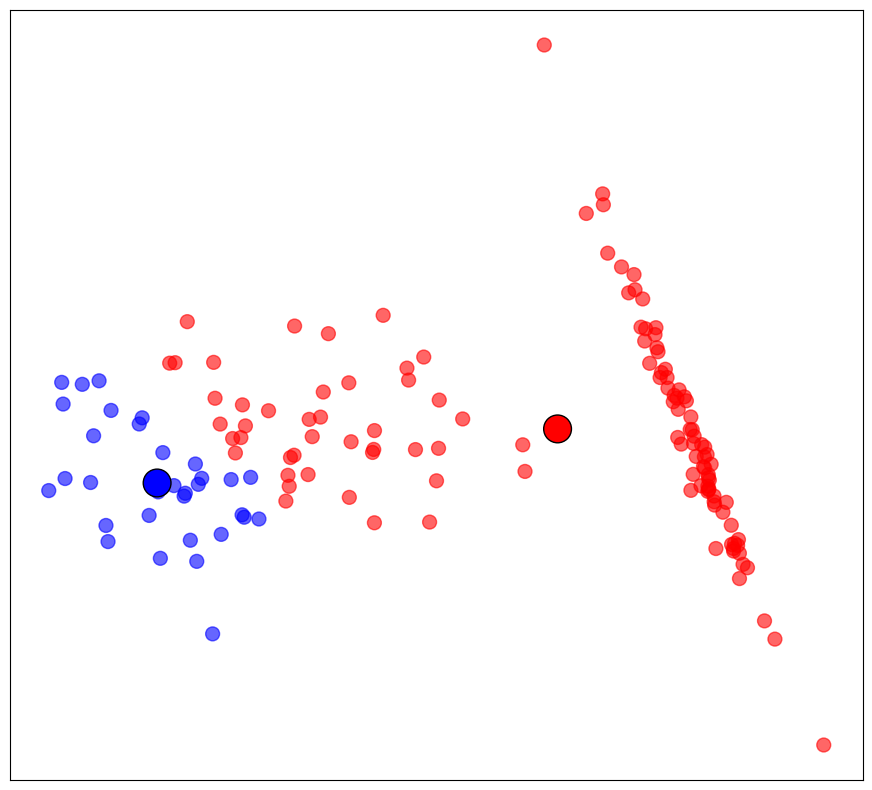

In [51]:
plot_cluster(X,centroids,
             cluster_label, centroids_label,)

In [52]:
class KMeans():
    def __init__(self,n_clusters = 2, centroids = None,
                 max_iter=10, tol=0.01,
                 metric = 'euclidean', p = 2,
                 random_state = None):
        self.n_clusters = n_clusters
        self.centroids  = centroids
        self.max_iter   = max_iter
        self.tol        = tol
        self.iters      = None
        self.inertia = None
        self.metric = metric
        self.p  = p
        self.random_state  = random_state
    #-------------------------------------
    def distance(self,X1, X2):
        if self.metric == 'euclidean':
            dist = np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
        if self.metric == 'cityblock':
            dist = np.sum(np.abs(X1 - X2).T,axis=0)
        if self.metric == 'Chebyshev':
            dist = np.max(np.abs(X1 - X2).T,axis=0)
        if self.metric == 'Minkowski':
            dist = np.power(np.sum(np.power(np.abs(X1 - X2),self.p).T,axis=0),1/self.p)
        return dist
    #-------------------------------------
    def init_centroids(self, X):
        if self.random_state: rng = np.random.seed(self.random_state)
        c_idxs = np.random.randint(0, X.shape[0], size = self.n_clusters)
        return X[c_idxs,:]
    #-------------------------------------
    def predict(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))

        for i,centr in enumerate(self.centroids):
            distances[:,i] = self.distance(centr,X)
        self.inertia = np.sum(np.power(np.min(distances,axis = 1),2))
        return np.argmin(distances,axis = 1)
    #-------------------------------------
    def transform(self,X):
        return self.predict(X)
    #-------------------------------------
    def delta_centroids(self,old_centroids):
        return (
                distance(self.centroids,old_centroids)/
                distance(old_centroids, np.mean(old_centroids))
               ).mean()
    #-------------------------------------
    def fit(self, X):

        if self.centroids is None:
            self.centroids = self.init_centroids(X)

        d_centrs = np.inf

        for i in range(self.max_iter):

            old_centroids = np.copy(self.centroids)

            cluster_label = self.predict(X)

            for k in range(self.n_clusters):

                c_idxs = np.flatnonzero(cluster_label==k)

                self.centroids[k] = X[c_idxs].mean(axis = 0)

            d_centrs = self.delta_centroids(old_centroids)

            self.iters = i
            if d_centrs<=self.tol:
                break
        return self
    #-------------------------------------
    def fit_transform(self, X):
        return self.fit(X).predict(X)



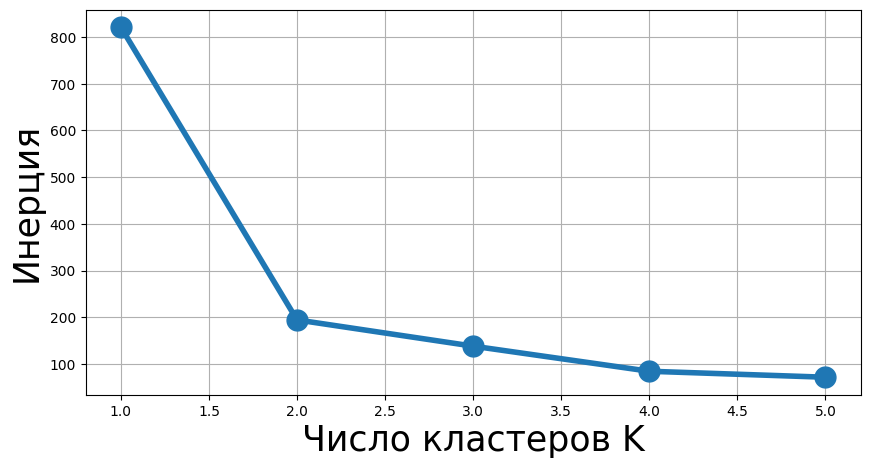

In [53]:
sse = []
list_k = list(range(1, 6))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia)

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',
         linewidth = 4, markersize = 15)
plt.xlabel('Число кластеров K', fontsize = 25)
plt.ylabel('Инерция', fontsize = 25)

plt.grid();
plt.xticks()
plt.yticks();

Мы остановились на итерации:: 3


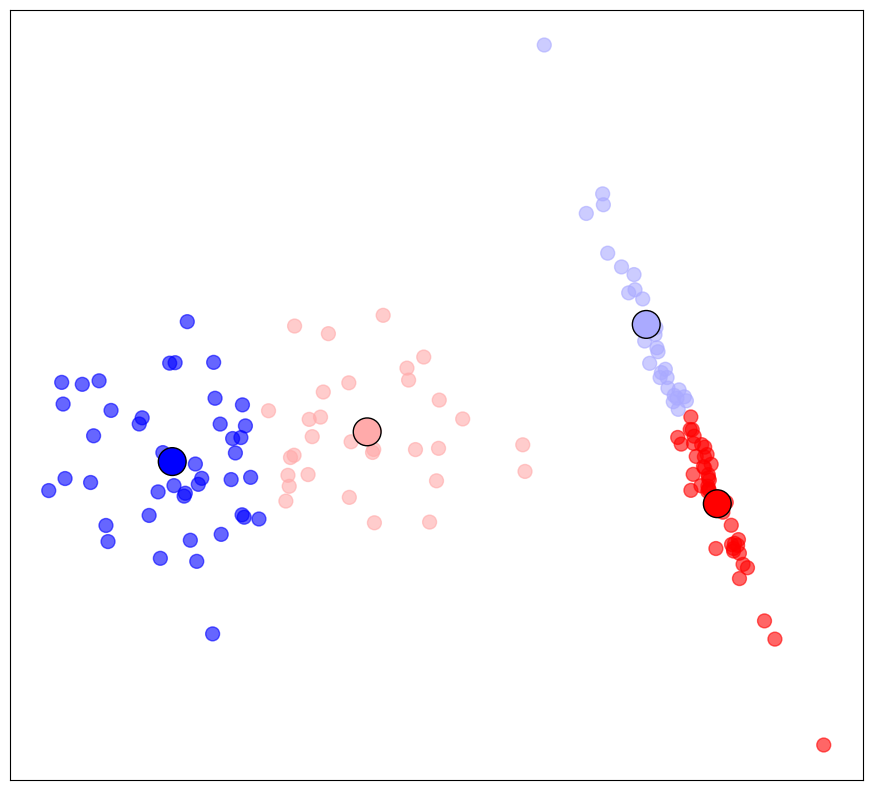

In [54]:
kmeans   = KMeans(n_clusters=4,max_iter=100, tol=0.01, random_state= 42)
c_labels = kmeans.fit_transform(X)

print('Мы остановились на итерации::',kmeans.iters)


plot_cluster(X,kmeans.centroids,
             c_labels, np.unique(c_labels),)

In [55]:
pd.crosstab(y,c_labels, rownames=['Метки'], colnames = ['Предсказания'])

Предсказания,0,1,2,3
Метки,,,,
0,43,0,32,0
1,0,30,0,45


# **Контрольные вопросы**

1. Оцените евклидово расстояние между векторами x1 {2, 5, 3 ,7}
и x2 {2, 7, 1, 5}.

In [56]:
x1 = np.array([2, 5, 3, 7])
x2 = np.array([2, 7, 1, 5])

print(distance(x1, x2, metric="euclidean", p=2))

3.4641016151377544


2. Оцените расстояние Чебышева между векторами x1 {0, 10, 4, 9}
и x2 {3, 7, 0, 2}.

In [57]:
x1 = np.array([0, 10, 4, 9])
x2 = np.array([3, 7, 0, 2])

print(distance(x1, x2, metric="Chebyshev", p=2))

7


3. Есть три центроида c1 {1, 0, 0}, c2 {0, 1, 1}, c3{1, 0, 1} и точка x
с координатами {2, 0, 2}. К какому кластеру следует отнести эту
точку при использовании евклидовой метрики расстояния?

In [58]:
cen_1 = np.array([1, 0, 0])
cen_2 = np.array([0, 1, 1])
cen_3 = np.array([1, 0, 1])

x = [2, 0, 2]

dis_1 = distance(cen_1, x, metric="euclidean")
dis_2 = distance(cen_2, x, metric="euclidean")
dis_3 = distance(cen_3, x, metric="euclidean")

map = {dis_1 : "Первый центроид", dis_2 : "Второй центроид", dis_3 : "Третий центроид"}
print("Первый центроид - {}\nВторой центроид - {}\nТретий центроид - {}".format(dis_1, dis_2, dis_3))

min_dis = min([dis_1, dis_2, dis_3])
print("Ответ: ", map[min_dis])

Первый центроид - 2.23606797749979
Второй центроид - 2.449489742783178
Третий центроид - 1.4142135623730951
Ответ:  Третий центроид


4. Как называется метод определения оптимального числа k (кла-
стеров) с использованием анализа инерции?

Метод локтя